In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
from Data import Data
from Pha3D import Pha3D
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

tjy_udf:  ['CalcF', 'H_find', 'Heights', 'Kap_D', 'elread', 'get_fp', 'get_fs', 'git_sync', 'lighten_color', 'phread', 'phreadxyz', 'plot_anim', 'plot_pha', 'plot_pha_feed', 'ticks']


In [3]:
fp_work, fp_home = 'C:/Users/takas/Downloads/', 'E:/Downloads/' 
fp = fp_work
# pha3d = Pha3D("ph_a25s25e3_cyl24-2.dat", dims=(18.4, 20.2, 48.2 ), discs=(0.20,0.20,0.20), fprefix=fp)

# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=3, zmax=25.0, reflect_over='sw', write_html=False)

In [10]:
fig = g
fname=fp+'pha_vol.html'
write_html = True
open_html = True

####################

fig.update_layout(scene_xaxis_showticklabels=True, scene_yaxis_showticklabels=True, scene_zaxis_showticklabels=True,
                          scene_aspectmode='data',
                          template='simple_white', width=1920, height=1080)
fig.update_traces(showscale=False)

if write_html: 
    #fig.write_html(fname) 
    '''
    f = open(fname, "w")
    f.close()
    with open(fname, 'a') as f:
        f.write(fig.to_html(full_html=False, include_plotlyjs=True))
    f.close()
    '''
    f = open(fname, "w")
    f.close()
    with open(fname, 'a') as f:
        f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))
    f.close()
    
    print('Wrote to {}'.format(fname))
    
    if open_html: 
        import webbrowser
        webbrowser.open(fname)
        print('Opening...')

Wrote to C:/Users/takas/Downloads/pha_vol.html
Opening...


In [12]:
f2_fnames = ['ph_a10s25e3_mic12-1.dat', 'ph_a25s25e3_cyl24-2.dat']
f2_boxes  = [(28.2, 25.8, 40.2), (18.4, 20.2, 48.2)]

###############

import plotly.graph_objects as go

pha3d = Pha3D(f2_fnames[1], dims=f2_boxes[1], fprefix=fp)
data = pha3d.get_vol(isomin=0.10, fprefix=fp, 
                     n_coarse=1, zmax=25.0, reflect_over='sw', write_html=False)


In [13]:
# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=3, zmax=25.0, reflect_over='sw', write_html=False)

opt = 'x'     # 'd'efault, 'x'z, 'y'z
d   = 3.0       # Distance from center
a   = 25        # Angle, if applicable
zcenter = 0.0 # Camera focal point

match opt:
    case 'd': eye=dict(x=-d/np.sqrt(3), y=-d/np.sqrt(3), z=d/np.sqrt(3)) #default
    case 'x': eye=dict(x=0, y=-d*np.cos(np.pi/180*a), z=d*np.sin(np.pi/180*a)) # xz at given angle
    case 'y': eye=dict(x=d*np.cos(np.pi/180*a), y=0, z=d*np.sin(np.pi/180*a)) # yz at given angle
    case  _ : eye=dict(x=-d/np.sqrt(3), y=-d/np.sqrt(3), z=d/np.sqrt(3)) #default
    # eye=dict(x=d, y=0.0, z=0.0) # yz
    # eye=dict(x=0.0, y=-d, z=0.0) # xz

camera = dict(
    up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z= zcenter),
    eye = eye
)

layout = go.Layout(
    autosize=False,
    font= dict(size=24, family='serif', color='black'),
    hovermode=False,
    scene =  dict( 
        xaxis = dict(nticks=3, range=[-18.41,18.41], title='',
                     ticks='outside',tickangle=0,tickwidth=1,ticklen=5,
                     ticktext= ['', '',''], tickvals= [-15, 0, 15],
                     spikethickness=0,
                     zeroline=False, showgrid=False, backgroundcolor='white',
                    ), 
        yaxis = dict(showticklabels=False, title='', zeroline=False, showgrid=False, backgroundcolor='white',), 
        zaxis = dict(nticks=3, range=[0,25.2], title='',
                     ticks='outside',tickangle=0,tickwidth=1,ticklen=5,
                     ticktext= ['', '', ''], tickvals= [0, 10, 20],
                     spikethickness=0,
                     zeroline=False, showgrid=False,backgroundcolor='white',
                    ), 
    ),
    scene_camera=camera,
    width=1200,
    height=800,
    margin=dict(l=20, r=20, t=20, b=20)
)
fig = go.Figure(data, layout)
fig.update_traces(showscale=False)

fname = fp+'pha_vol.html'
f = open(fname, "w")
f.close()
with open(fname, 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))
f.close()
print('Wrote to {}'.format(fname))
    
import webbrowser
webbrowser.open(fname)
print('Opening...')

Wrote to C:/Users/takas/Downloads/pha_vol.html
Opening...


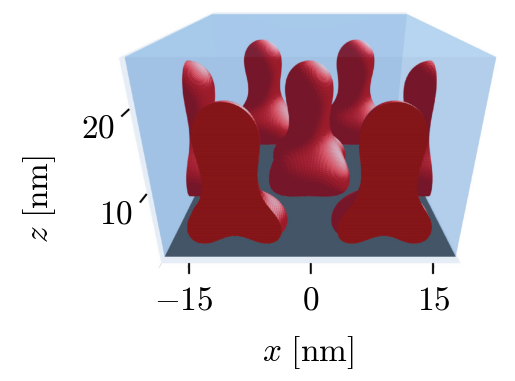

In [16]:
from PIL import Image
img = np.asarray(Image.open("../figures/SYSG3/a25_cyl-empty.png"))
plt.imshow(img)
kwargs = dict(transform=plt.gca().transAxes, fontsize=24)
p = lambda x: r'$\mathrm{{ {:} }}$'.format(x)
f = plt.gcf()
plt.axis('off')

## x
plt.text(0.29,   0.17,p(-15), **kwargs)
plt.text(0.5888, 0.17, p(0), **kwargs)
plt.text(0.82,   0.17,p(15),**kwargs)
## y
plt.text(0.179, 0.408, p(10), **kwargs)
plt.text(0.143, 0.645, p(20),**kwargs)
## labs
plt.text(0.60, 0.025, r'$x~\mathrm{[nm]}$', horizontalalignment='center', **kwargs)
plt.text(0.06, 0.38, r'$z~\mathrm{[nm]}$', horizontalalignment='center', **kwargs, rotation=90)

plt.savefig('../figures/SYSG3/a25_cyl.pdf')
plt.show()

In [29]:
class Process3D:
    ''' 
    args : { fname, dims, fprefix, ( default: isomin, n_coarse, zmax, reflect_over ) }
    '''
    def __init__(self, **args):
        try:
            pha3d = Pha3D(fname, dims=dims, fprefix=fp) 
            data = pha3d.get_vol(isomin=isomin, fprefix=fp,  n_coarse=1, zmax=25.0, reflect_over='sw', write_html=False)
            print('success')
        except KeyError:
            print('KeyError')
            return
            
    

In [34]:
Process3D(
    dict(fname = f2_fnames[1], dims=f2_boxes[1], fprefix=fp,
         isomin=0.10, n_coarse=1, zmax=25.0, reflect_over='sw')
)

TypeError: Process3D.__init__() takes 1 positional argument but 2 were given